In [1]:
import numpy as np
import pandas as pd
from tflearn.data_utils import build_hdf5_image_dataset
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.misc import imresize
from PIL import ImageEnhance
import os
import glob
from joblib import Parallel, delayed
import SimpleITK as sitk
from sklearn.cross_validation  import train_test_split
from PIL import Image
from scipy.misc import imread
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import tflearn
import tensorflow as tf
from sklearn.metrics import classification_report

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
annotations = pd.read_csv('annotations.csv')
candidates = pd.read_csv('candidates.csv')

In [48]:
class CTScan(object):
    def __init__(self, filename = None, coords = None):
        self.filename = filename
        self.coords = coords
        self.ds = None
        self.image = None
    def reset_coords(self, coords):
        self.coords = coords

    def read_mhd_image(self):
        path = glob.glob('./subset0/' + self.filename +'.mhd')
        self.ds = sitk.ReadImage(path[0])
        self.image = sitk.GetArrayFromImage(self.ds)


    def get_voxel_coords(self):
        origin = self.ds.GetOrigin()
        resolution = self.ds.GetSpacing()
        voxel_coords = [np.absolute(self.coords[j]-origin[j])/resolution[j] \
            for j in range(len(self.coords))]
        return tuple(voxel_coords)
    
    def get_image(self):
        return self.image
    
    def get_subimage(self, width):
        self.read_mhd_image()
        x, y, z = self.get_voxel_coords()
        subImage = self.image[int(z), int(y-width/2):int(y+width/2), int(x-width/2):int(x+width/2)]
        return subImage   
    
    def normalizePlanes(self, npzarray):
        maxHU = 400.
        minHU = -1000.
        npzarray = (npzarray - minHU) / (maxHU - minHU)
        npzarray[npzarray>1] = 1.
        npzarray[npzarray<0] = 0.
        return npzarray
    
    def save_image(self, filename, width):
        image = self.get_subimage(width)
        image = self.normalizePlanes(image)
        Image.fromarray(image*255).convert('L').save(filename)

In [49]:
positives = candidates[candidates['class']==1].index  
negatives = candidates[candidates['class']==0].index

In [50]:
positives

Int64Index([ 1387,  2033,  3250,  5029,  5803,  6141,  6808,  7584,  7591,
             7905,
            ...
            52844, 52945, 53110, 53775, 55694, 55774, 55921, 56165, 56315,
            56388],
           dtype='int64', length=122)

In [51]:
negatives

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            56906, 56907, 56908, 56909, 56910, 56911, 56912, 56913, 56914,
            56915],
           dtype='int64', length=56794)

In [52]:
np.random.seed(42)
negIndexes = np.random.choice(negatives, len(positives)*5, replace = False)

candidatesDf = candidates.iloc[list(positives)+list(negIndexes)]

X = candidatesDf.iloc[:,:-1]
y = candidatesDf.iloc[:,-1]

In [54]:
candidatesDf['class'].value_counts()


0    610
1    122
Name: class, dtype: int64

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.to_pickle('traindata')
y_train.to_pickle('trainlabels')
X_test.to_pickle('testdata')
y_test.to_pickle('testlabels')

In [56]:
def create_data(idx, outDir, data,  width = 50):
    '''
    Generates your test, train, validation images
    outDir = a string representing destination
    width (int) specify image size
    '''
    scan = CTScan(np.asarray(data.loc[idx])[0], \
              np.asarray(data.loc[idx])[1:])
    outfile = outDir  +  str(idx)+ '.jpg'
    scan.save_image(outfile, width)

In [10]:
inpfile =  'traindata'
outDir = 'train/image_'
inpfile2 =  'testdata'
outDir2 = 'test/image_'
X_data2=pd.read_pickle(inpfile2)
X_data = pd.read_pickle(inpfile)


In [521]:
Parallel(n_jobs = 4)(delayed(create_data)(idx, outDir, X_data) for idx in X_data.index)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [528]:
Parallel(n_jobs = 4)(delayed(create_data)(idx2, outDir2, X_data2) for idx2 in X_data2.index)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


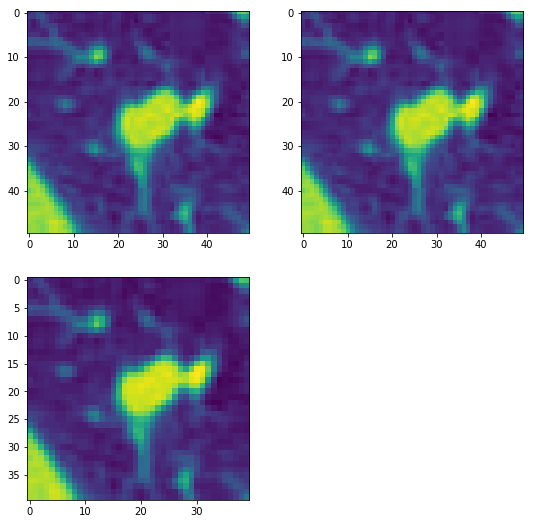

In [46]:
from scipy.misc import imresize
from PIL import ImageEnhance
dirName = './train/'
plt.figure(figsize = (9,9))
inp = imread(dirName + 'image_'+ str(13655) + '.jpg')
plt.subplot(221)
plt.imshow(inp)
plt.grid(False)

Pp = PreProcessing(inp)

inp2 = Pp.subtract_mean()
plt.subplot(222)
plt.imshow(inp2)
plt.grid(False)

inp3 = Pp.downsample_data()
plt.subplot(223)
plt.imshow(inp3)
plt.grid(False)



In [43]:


class PreProcessing(object):
    def __init__(self, image = None):
        self.image = image
    
    def subtract_mean(self):
        self.image = (self.image/255.0 - 0.25)*255
        return self.image
    
    def downsample_data(self):
        self.image = imresize(self.image, size = (50, 50), interp='bilinear', mode='L')
        return self.image
    
    def enhance_contrast(self):
        self.image = ImageEnhance.Contrast(self.image)
        return self.image

In [46]:
train_filenames =X_data.index.to_series().apply(lambda x:'./train/image_'+str(x)+'.jpg')

In [61]:

dataset_file = 'traindatalabels.txt'
   
filenames = train_filenames.values.astype(str)
labels = y_train.values.astype(int)
traindata = np.zeros(filenames.size,\
                     dtype=[('var1', 'S36'), ('var2', int)])
traindata['var1'] = filenames
traindata['var2'] = labels

np.savetxt(dataset_file, traindata, fmt="%10s %d")

In [62]:
filenames

array(['./train/image_16222.jpg', './train/image_27142.jpg',
       './train/image_49331.jpg', './train/image_28973.jpg',
       './train/image_28506.jpg', './train/image_27383.jpg',
       './train/image_15246.jpg', './train/image_6808.jpg',
       './train/image_40473.jpg', './train/image_49915.jpg',
       './train/image_7692.jpg', './train/image_41085.jpg',
       './train/image_39525.jpg', './train/image_39287.jpg',
       './train/image_40387.jpg', './train/image_26379.jpg',
       './train/image_50285.jpg', './train/image_20248.jpg',
       './train/image_51807.jpg', './train/image_27149.jpg',
       './train/image_27096.jpg', './train/image_42884.jpg',
       './train/image_7830.jpg', './train/image_44681.jpg',
       './train/image_36122.jpg', './train/image_13442.jpg',
       './train/image_48982.jpg', './train/image_20117.jpg',
       './train/image_6431.jpg', './train/image_4035.jpg',
       './train/image_3791.jpg', './train/image_52336.jpg',
       './train/image_42123.jp

In [63]:
build_hdf5_image_dataset(dataset_file, image_shape=(50, 50), mode='file', output_path='traindataset4.h5', categorical_labels=True, normalize=True)

In [4]:
# Load HDF5 dataset
import h5py
h5f = h5py.File('traindataset4.h5', 'r')
X_train_images = h5f['X']
Y_train_labels = h5f['Y']
X_train_images

<HDF5 dataset "X": shape (585, 50, 50, 3), type "<f4">

In [13]:
h5f.close()


In [15]:
Y_train_labels

<HDF5 dataset "Y": shape (585, 2), type "<f4">

In [71]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [72]:
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

In [73]:
network = input_data(shape=[None, 50, 50, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)

In [74]:
network = conv_2d(network, 50, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)





Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [75]:

model = tflearn.DNN(network, tensorboard_verbose=0, checkpoint_path='nodule-classifier.tfl.ckpt')


In [20]:
model = tflearn.DNN(network, tensorboard_verbose=0, checkpoint_path='nodule-classifier.tfl.ckpt')

model.fit(X_train_images, Y_train_labels, n_epoch=100, shuffle=True,show_metric=True, batch_size=96,snapshot_epoch=True)

model.save("nodule-classifier.tfl")

Training Step: 699  | total loss: 0.03625 | time: 6.022s
| Adam | epoch: 100 | loss: 0.03625 - acc: 0.9868 -- iter: 576/585
Training Step: 700  | total loss: 0.03593 | time: 7.415s
| Adam | epoch: 100 | loss: 0.03593 - acc: 0.9860 -- iter: 585/585
--
INFO:tensorflow:C:\Users\User\nodule-classifier.tfl.ckpt-700 is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:C:\Users\User\nodule-classifier.tfl is not in all_model_checkpoint_paths. Manually adding it.


In [21]:
test_filenames =X_test.index.to_series().apply(lambda x:'./test/image_'+str(x)+'.jpg')

In [22]:
tdataset_file = 'testdatalabels.txt'
   
tfilenames = test_filenames.values.astype(str)
tlabels = y_test.values.astype(int)
testdata = np.zeros(tfilenames.size,\
                     dtype=[('var1', 'S36'), ('var2', int)])
testdata['var1'] = tfilenames
testdata['var2'] = tlabels

np.savetxt(tdataset_file, testdata, fmt="%10s %d")

In [23]:
build_hdf5_image_dataset(tdataset_file, image_shape=(50, 50), mode='file', output_path='testdata1.h5', categorical_labels=True, normalize=True)

In [19]:
model.load("nodule-classifier.tfl")

INFO:tensorflow:Restoring parameters from C:\Users\User\nodule-classifier.tfl


In [20]:
hf2 = h5py.File('testdata1.h5', 'r')
X_test_images = hf2['X']
Y_test_labels = hf2['Y']

In [21]:
Y=Y_test_labels[:]

In [22]:
 predict=model.predict(X_test_images[:,:,:,:])

In [23]:
score = model.evaluate(X_test_images, Y_test_labels)
score

[0.870748297292359]

In [25]:
y_pred=np.argmax(predict, axis=1)

In [27]:
Y_real=np.argmax(Y, axis=1)

In [29]:
print(classification_report(Y_real, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       116
          1       0.83      0.48      0.61        31

avg / total       0.87      0.87      0.86       147



In [7]:
from gensim.summarization import summarize

C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
text1='If you only have one small tumor in your lung and there is no evidence of cancer in lymph nodes or elsewhere, your doctors may recommend surgery to remove the tumor and the nearby lymph nodes.Very few patients with SCLC are treated this way. This is only an option if you are in fairly good health and can withstand having all or part of a lung removed.Before the operation, the lymph nodes in your chest will be checked for cancer spread with mediastinoscopy or other tests, because surgery is unlikely to be a good option if the cancer has spread.Surgery is generally followed by chemotherapy. If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well. The radiation is often given at the same time as the chemo. Although this increases the side effects of treatment, it appears to be more effective than giving one treatment after the other. You might not be given radiation therapy if you already have severe lung disease (in addition to your cancer) or other serious health problems.In about half of people with SCLC, the cancer will eventually spread to the brain if no preventive measures are taken. For this reason, you may be given radiation therapy to the head (called prophylactic cranial irradiation, or PCI) to try to prevent this. The radiation is usually given in low doses. Still, some patients may have side effects from the radiation.'

In [10]:
text2='For most people with limited stage SCLC, surgery is not an option because the tumor is too large, it’s in a place that can’t be removed easily, or it has spread to nearby lymph nodes or other places in the lung. If you are in good health, the standard treatment is chemo plus radiation to the chest given at the same time (called concurrent chemoradiation). The chemo drugs used are usually etoposide plus either cisplatin or carboplatin.Concurrent chemoradiation can help people with limited stage SCLC live longer and give them a better chance at cure than giving one treatment (or one treatment at a time). The downside is that this combination has more side effects than either chemo or radiation alone, and it can be hard to take.People who aren’t healthy enough for chemoradiation are usually treated with chemo by itself. This may be followed by radiation to the chest.If no measures are taken to prevent it, about half of people with SCLC will have cancer spread to their brain. If your cancer has responded well to initial treatment, you may be given radiation therapy to the head (called prophylactic cranial irradiation, or PCI) to try to prevent this. The radiation is usually given in lower doses than what is used if the cancer had already spread to brain, but some patients may still have side effects from the radiation.Most people treated with chemo (with or without radiation) for limited stage SCLC will have their tumors shrink significantly. In many, the cancer will shrink to the point where it can no longer be seen on imaging tests. Unfortunately, for most people, the cancer will return at some point.Because these cancers are hard to cure, clinical trials of newer treatments may be a good option for some people. If you think you might want to take part in a clinical trial, talk to your doctor.'

In [14]:
state1= summarize(text1, ratio=0.3)

In [18]:
state2= summarize(text2, ratio=0.2)

In [20]:
check=pd.read_csv('new.csv')

In [45]:
checkX = check.iloc[:,:-1]
checky = check.iloc[:,0]

In [61]:
inpfilecheck =  'checkdata'
outDircheck = 'check/image_'
check_data=checkX


In [63]:
Parallel(n_jobs = 4)(delayed(create_data)(idx3, outDircheck, check_data) for idx3 in check_data.index)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [64]:
check_filenames =check_data.index.to_series().apply(lambda x:'./check/image_'+str(x)+'.jpg')

In [68]:
dataset_check = 'checklabels.txt'
   
filenames = check_filenames.values.astype(str)
checkdata = np.zeros(filenames.size,\
                     dtype=[('var1', 'S36')])
checkdata['var1'] = filenames

np.savetxt(dataset_check, checkdata, fmt="%10s")

In [82]:
build_hdf5_image_dataset(dataset_check, image_shape=(50, 50), mode='file', output_path='checkdata2.h5', categorical_labels=True, normalize=True)

In [83]:
model.load("nodule-classifier.tfl")

INFO:tensorflow:Restoring parameters from C:\Users\User\nodule-classifier.tfl


In [85]:
import h5py
hf3 = h5py.File('checkdata2.h5', 'r')
X_check_images = hf3['X']

In [86]:
 predict=model.predict(X_check_images[:,:,:,:])

In [87]:
y_pred=np.argmax(predict, axis=1)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [104]:
df = pd.DataFrame()

In [123]:
checky = check.iloc[:,-1]
ids= check.iloc[:,0]

In [125]:
df['id']=ids
df['predict']=y_pred.tolist()
df['diameter']=checky.tolist()


In [128]:
d1 = df[(df.predict == 1) & (df.diameter <10)]
d2 = df[(df.predict == 1) & (df.diameter >=10)]
d1['treatment']=state1
d2['treatment']=state2

C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [131]:
d1.head(5)

,predict,diameter,id,treatment
0,1,6.440879,1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896...,If cancer is found in the lymph nodes that wer...
2,1,4.343200,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,If cancer is found in the lymph nodes that wer...
3,1,4.681382,1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674...,If cancer is found in the lymph nodes that wer...
4,1,6.378436,1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048...,If cancer is found in the lymph nodes that wer...
7,1,7.888814,1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...,If cancer is found in the lymph nodes that wer...


In [132]:
d2.head(5)

,predict,diameter,id,treatment
1,1,13.596471,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,"If you are in good health, the standard treatm..."
10,1,11.139832,1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752...,"If you are in good health, the standard treatm..."
11,1,17.693824,1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752...,"If you are in good health, the standard treatm..."
15,1,15.485254,1.3.6.1.4.1.14519.5.2.1.6279.6001.154677396354...,"If you are in good health, the standard treatm..."
17,1,17.753232,1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205...,"If you are in good health, the standard treatm..."
